In [1]:
pip install prophet

     |████████████████████████████████| 65 kB 2.0 MB/s 
     |████████████████████████████████| 49 kB 4.2 MB/s 
     |████████████████████████████████| 45 kB 2.3 MB/s 
  Created wheel for prophet: filename=prophet-1.0.1-py3-none-any.whl size=6640289 sha256=a6c5ccc2c3d2f12af571fd0d5028158440ee277be6677a5e0906cb4fddfa6fc2
  Stored in directory: /root/.cache/pip/wheels/4e/a0/1a/02c9ec9e3e9de6bdbb3d769d11992a6926889d71567d6b9b67
Successfully built prophet
  Attempting uninstall: cmdstanpy
    Found existing installation: cmdstanpy 0.9.5
    Uninstalling cmdstanpy-0.9.5:
      Successfully uninstalled cmdstanpy-0.9.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
fbprophet 0.7.1 requires cmdstanpy==0.9.5, but you have cmdstanpy 0.9.68 which is incompatible.


In [3]:
pip install yfinance

     |████████████████████████████████| 63 kB 1.3 MB/s 
     |████████████████████████████████| 6.4 MB 10.8 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [4]:
from fbprophet import Prophet
import pandas as pd, matplotlib.pyplot as plt, yfinance as yf

In [5]:
df = yf.download('XRP-USD')

[*********************100%***********************]  1 of 1 completed


In [6]:
df.reset_index(inplace = True)
df = df[['Date', 'Adj Close']]

In [7]:
df.columns = ['ds', 'y']

In [8]:
df

,ds,y
0,2017-11-09,0.217488
1,2017-11-10,0.206483
2,2017-11-11,0.210430
3,2017-11-12,0.197339
4,2017-11-13,0.203442
...,...,...
1639,2022-05-06,0.602570
1640,2022-05-07,0.582347
1641,2022-05-08,0.566527
1642,2022-05-09,0.492940


In [9]:
model = Prophet()  #inistialising model

In [10]:
model.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [11]:
model.component_modes

{'additive': ['yearly',
  'weekly',
  'additive_terms',
  'extra_regressors_additive',
  'holidays'],
 'multiplicative': ['multiplicative_terms', 'extra_regressors_multiplicative']}

In [12]:
df.tail()

,ds,y
1639,2022-05-06,0.602570
1640,2022-05-07,0.582347
1641,2022-05-08,0.566527
1642,2022-05-09,0.492940
1643,2022-05-10,0.516035


In [27]:
future_dates = model.make_future_dataframe(periods= 45)

In [28]:
future_dates.tail()

,ds
1684,2022-06-20
1685,2022-06-21
1686,2022-06-22
1687,2022-06-23
1688,2022-06-24


In [15]:
prediction = model.predict(future_dates)

In [16]:
prediction.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
1699,2022-07-05,0.709161,0.306344,0.887690,0.690161,0.728452,-0.095990,-0.095990,-0.095990,-0.003267,-0.003267,-0.003267,-0.092723,-0.092723,-0.092723,0.0,0.0,0.0,0.613170
1700,2022-07-06,0.708416,0.309808,0.898956,0.688760,0.728523,-0.095030,-0.095030,-0.095030,-0.000848,-0.000848,-0.000848,-0.094182,-0.094182,-0.094182,0.0,0.0,0.0,0.613386
1701,2022-07-07,0.707672,0.310547,0.913665,0.687304,0.728531,-0.097525,-0.097525,-0.097525,-0.001728,-0.001728,-0.001728,-0.095797,-0.095797,-0.095797,0.0,0.0,0.0,0.610146
1702,2022-07-08,0.706927,0.313934,0.903748,0.685691,0.728583,-0.097608,-0.097608,-0.097608,-0.000038,-0.000038,-0.000038,-0.097570,-0.097570,-0.097570,0.0,0.0,0.0,0.609319
1703,2022-07-09,0.706183,0.332953,0.913812,0.684554,0.728373,-0.095553,-0.095553,-0.095553,0.003937,0.003937,0.003937,-0.099491,-0.099491,-0.099491,0.0,0.0,0.0,0.610629


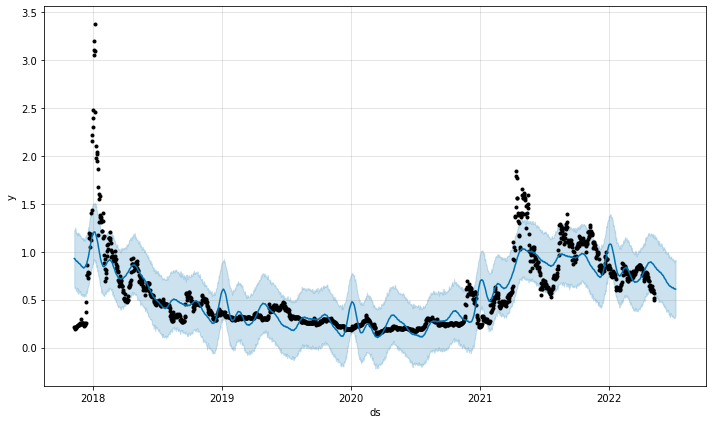

In [17]:
fig = model.plot(prediction)

In [18]:
from fbprophet.plot import plot_plotly
plot_plotly(model, prediction)

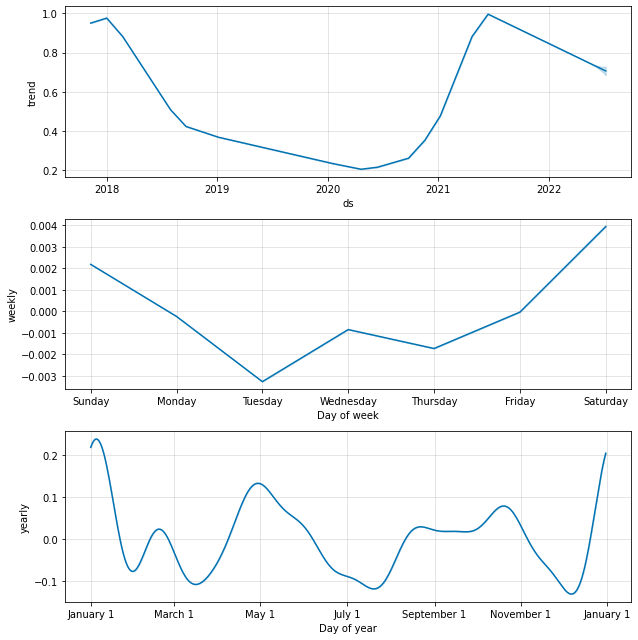

In [19]:
fig2 = model.plot_components(prediction)

In [20]:
from fbprophet.diagnostics import cross_validation

In [29]:
df_cv = cross_validation(model, horizon = '45 days')

INFO:fbprophet:Making 55 forecasts with cutoffs between 2018-11-27 00:00:00 and 2022-03-26 00:00:00


  0%|          | 0/55 [00:00<?, ?it/s]

In [30]:
df_cv.tail()

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
2470,2022-05-06,1.069360,0.777187,1.361416,0.602570,2022-03-26
2471,2022-05-07,1.066698,0.778158,1.375919,0.582347,2022-03-26
2472,2022-05-08,1.057211,0.747851,1.337042,0.566527,2022-03-26
2473,2022-05-09,1.047412,0.740953,1.362885,0.492940,2022-03-26
2474,2022-05-10,1.036289,0.756217,1.334073,0.516035,2022-03-26


In [23]:
from fbprophet.diagnostics import performance_metrics

In [24]:
df_performance = performance_metrics(df_cv)

In [31]:
df_performance

,horizon,mse,rmse,mae,mape,mdape,coverage
0,6 days,0.094422,0.307282,0.213360,0.553811,0.355914,0.707317
1,7 days,0.101660,0.318841,0.223512,0.592277,0.381168,0.678862
2,8 days,0.109321,0.330637,0.234093,0.629756,0.396340,0.666667
3,9 days,0.116604,0.341473,0.243617,0.664878,0.414857,0.650407
4,10 days,0.124680,0.353101,0.254433,0.699482,0.449668,0.626016
5,11 days,0.132994,0.364684,0.264099,0.733084,0.466370,0.613821
6,12 days,0.141545,0.376225,0.274451,0.765181,0.470938,0.601626
7,13 days,0.147817,0.384469,0.282051,0.790350,0.482898,0.605691
8,14 days,0.153676,0.392015,0.289187,0.815262,0.492403,0.605691
9,15 days,0.160650,0.400811,0.298699,0.837588,0.524478,0.601626


/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:526: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.

/usr/local/lib/python3.7/dist-packages/fbprophet/plot.py:527: FutureWarning:

casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.



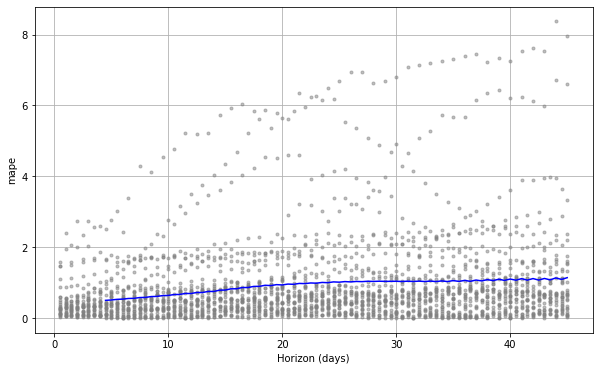

In [32]:
from fbprophet import plot

fig2 = plot.plot_cross_validation_metric(df_cv, metric='mape')